In [27]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt



In [28]:
# Read the .csv file
housing_price = pd.read_csv('Resources/housing_prices.csv')
housing_price.head()


,Date,Area,Composite_HPI,Two_Storey_HPI,Apartment_HPI,Composite_Benchmark,Two_Storey_Benchmark,Apartment_Benchmark
0,Jan 2005,Barrie_and_District,100.0,100.0,100.0,209000.0,220600.0,166400.0
1,Feb 2005,Barrie_and_District,101.5,101.2,100.3,212100.0,223200.0,166900.0
2,Mar 2005,Barrie_and_District,102.8,102.9,100.6,214800.0,227000.0,167400.0
3,Apr 2005,Barrie_and_District,103.5,103.4,100.9,216300.0,228100.0,167900.0
4,May 2005,Barrie_and_District,104.5,104.0,101.2,218400.0,229400.0,168400.0


In [29]:
# Get the dimensions of the DataFrame
housing_price.shape

(1124, 8)

In [30]:
# Drop any field which have no value
housing_price = housing_price.dropna()
housing_price.head()


,Date,Area,Composite_HPI,Two_Storey_HPI,Apartment_HPI,Composite_Benchmark,Two_Storey_Benchmark,Apartment_Benchmark
0,Jan 2005,Barrie_and_District,100.0,100.0,100.0,209000.0,220600.0,166400.0
1,Feb 2005,Barrie_and_District,101.5,101.2,100.3,212100.0,223200.0,166900.0
2,Mar 2005,Barrie_and_District,102.8,102.9,100.6,214800.0,227000.0,167400.0
3,Apr 2005,Barrie_and_District,103.5,103.4,100.9,216300.0,228100.0,167900.0
4,May 2005,Barrie_and_District,104.5,104.0,101.2,218400.0,229400.0,168400.0


In [31]:
# Get the dimensions of the DataFrame
housing_price.shape


(1110, 8)

In [32]:
# Rename the headers to get a clear understanding of the column
housing_price = housing_price.rename(columns = {"Area" : "Region",
                                               "Composite_HPI" : "Composite HPI",
                                               "Two_Storey_HPI" : "Two Storey HPI",
                                               "Apartment_HPI" : "Apartment HPI",
                                               "Composite_Benchmark" : "Benchmark Price (Composite)",
                                               "Two_Storey_Benchmark" : "Benchmark Price (Two-Storey)",
                                               "Apartment_Benchmark" : "Benchmark Price (Apartment)"
                                               })
housing_price.head()


,Date,Region,Composite HPI,Two Storey HPI,Apartment HPI,Benchmark Price (Composite),Benchmark Price (Two-Storey),Benchmark Price (Apartment)
0,Jan 2005,Barrie_and_District,100.0,100.0,100.0,209000.0,220600.0,166400.0
1,Feb 2005,Barrie_and_District,101.5,101.2,100.3,212100.0,223200.0,166900.0
2,Mar 2005,Barrie_and_District,102.8,102.9,100.6,214800.0,227000.0,167400.0
3,Apr 2005,Barrie_and_District,103.5,103.4,100.9,216300.0,228100.0,167900.0
4,May 2005,Barrie_and_District,104.5,104.0,101.2,218400.0,229400.0,168400.0


In [33]:

housing_price["Region"].unique()

array(['Barrie_and_District', 'Greater_Toronto', 'Guelph',
       'Hamilton_Burlington', 'Niagara_Region', 'Oakville_Milton'],
      dtype=object)

In [34]:
# housing_price = housing_price.loc[housing_price["Region"] == "Barrie_and_District"]
# housing_price["Region"].rename()


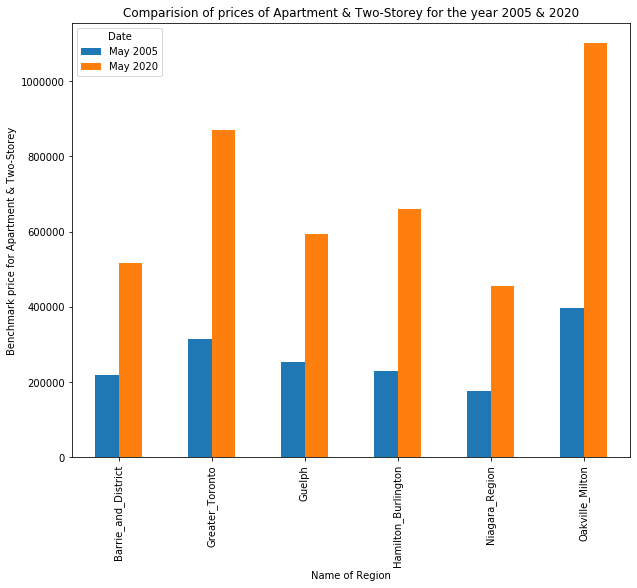

<Figure size 1440x720 with 0 Axes>

In [35]:
# Get the data to compare the price of the building during May 2005 and May 2020
housingPrice_2005_2020 = housing_price.loc[((housing_price["Date"] == "May 2005") | (housing_price["Date"] == "May 2020"))]
housingPrice_2005_2020 = housingPrice_2005_2020[["Date", "Region", "Benchmark Price (Composite)"]]

# Return reshaped organized DataFrame 
housingPrice_pivot = housingPrice_2005_2020.pivot(index= "Region", columns= "Date", values= "Benchmark Price (Composite)" )
housingPrice_pivot.plot(kind = "bar", rot = "vertical", figsize = (10, 8))
plt.xlabel("Name of Region")
plt.ylabel("Benchmark price for Apartment & Two-Storey")
plt.title("Comparision of prices of Apartment & Two-Storey for the year 2005 & 2020")
plt.figure(figsize = (20, 10))
plt.show()


# Observation
We selected 6 regions in Canada to compare the prices of apartment and two-storey buildings. We have data from Jan 2005 till May 2020. We are comparing the prices of apartment and two-storey for the month of May in 2005 and 2020. 
From the above bar chart, we see that the prices have increased more than two folds in all regions.

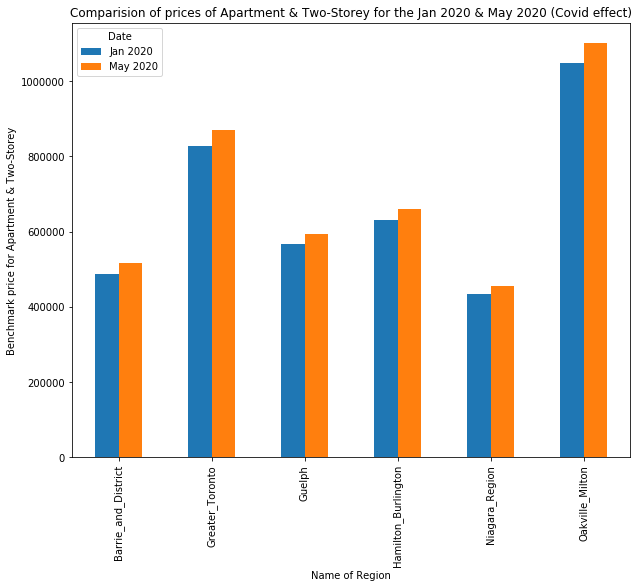

<Figure size 1440x720 with 0 Axes>

In [38]:
housingPrice_2005_2020 = housing_price.loc[((housing_price["Date"] == "Jan 2020") | (housing_price["Date"] == "May 2020"))]
housingPrice_2005_2020 = housingPrice_2005_2020[["Date", "Region", "Benchmark Price (Composite)"]]

housingPrice_pivot = housingPrice_2005_2020.pivot(index= "Region", columns= "Date", values= "Benchmark Price (Composite)")
housingPrice_pivot.plot(kind = "bar", rot = "vertical", figsize = (10, 8))
plt.xlabel("Name of Region")
plt.ylabel("Benchmark price for Apartment & Two-Storey")
plt.title("Comparision of prices of Apartment & Two-Storey for the Jan 2020 & May 2020 (Covid effect)")
plt.figure(figsize = (20, 10))
plt.show()


# Observation
On 11th March, 2020, the WHO declared Covid -19 as pandemic. To analyse about the impact of Covid-19 on the housing prices, we are comparing the house prices from Jan 2020 and May 2020. To our astonishment, we see that the house prices have increased irrespective of the pandemic.

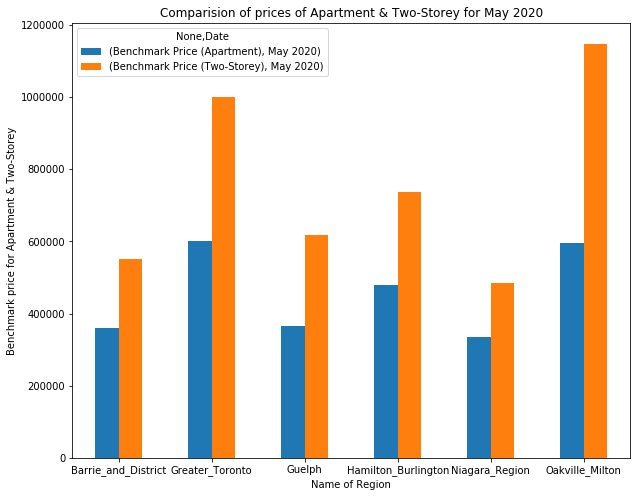

<Figure size 1440x720 with 0 Axes>

In [39]:
housingPrice_2005_2020 = housing_price.loc[(housing_price["Date"] == "May 2020")]
new = housingPrice_2005_2020.pivot(index= "Region", columns= "Date", values= ["Benchmark Price (Apartment)", "Benchmark Price (Two-Storey)"] )
new.plot(kind = "bar", rot = 0, figsize = (10, 8))
plt.xlabel("Name of Region")
plt.ylabel("Benchmark price for Apartment & Two-Storey")
plt.title("Comparision of prices of Apartment & Two-Storey for May 2020")
plt.figure(figsize = (20, 10))
plt.show()


# Observation
From the above chart, we see that the price of apartment is always cheaper than the two-storey building in any region.